## Lectura básica

In [2]:
from pyspark import SparkContext,HiveContext
from pyspark.sql import SQLContext,SparkSession
from pyspark.sql import functions as F

import os
import subprocess

import pandas as pd
from datetime import date

In [3]:
ruta = '/chicago'

In [4]:
cmd = f'hdfs dfs -ls {ruta}'
cmd

'hdfs dfs -ls /chicago'

In [5]:
lst = subprocess.check_output(cmd,shell=True).decode('utf8').strip().split('\n')
lst = [f'hdfs://{x.split(" ")[-1]}' for x in lst if x[-3:]=='csv']
#lst = [f'file://{x.split(" ")[-1]}' for x in lst if x[-3:]=='csv']
lst

['hdfs:///chicago/chicago_taxi_trips_2016_01.csv',
 'hdfs:///chicago/chicago_taxi_trips_2016_02.csv',
 'hdfs:///chicago/chicago_taxi_trips_2016_03.csv',
 'hdfs:///chicago/chicago_taxi_trips_2016_04.csv',
 'hdfs:///chicago/chicago_taxi_trips_2016_05.csv',
 'hdfs:///chicago/chicago_taxi_trips_2016_06.csv',
 'hdfs:///chicago/chicago_taxi_trips_2016_07.csv',
 'hdfs:///chicago/chicago_taxi_trips_2016_08.csv',
 'hdfs:///chicago/chicago_taxi_trips_2016_09.csv',
 'hdfs:///chicago/chicago_taxi_trips_2016_10.csv',
 'hdfs:///chicago/chicago_taxi_trips_2016_11.csv',
 'hdfs:///chicago/chicago_taxi_trips_2016_12.csv']

In [6]:
spark = SparkSession.builder.appName('bigdatita').getOrCreate()

In [7]:
df = spark.read.csv(lst,inferSchema=False,header=True)

In [8]:
type(df)

pyspark.sql.dataframe.DataFrame

In [9]:
df.printSchema()

root
 |-- taxi_id: string (nullable = true)
 |-- trip_start_timestamp: string (nullable = true)
 |-- trip_end_timestamp: string (nullable = true)
 |-- trip_seconds: string (nullable = true)
 |-- trip_miles: string (nullable = true)
 |-- pickup_census_tract: string (nullable = true)
 |-- dropoff_census_tract: string (nullable = true)
 |-- pickup_community_area: string (nullable = true)
 |-- dropoff_community_area: string (nullable = true)
 |-- fare: string (nullable = true)
 |-- tips: string (nullable = true)
 |-- tolls: string (nullable = true)
 |-- extras: string (nullable = true)
 |-- trip_total: string (nullable = true)
 |-- payment_type: string (nullable = true)
 |-- company: string (nullable = true)
 |-- pickup_latitude: string (nullable = true)
 |-- pickup_longitude: string (nullable = true)
 |-- dropoff_latitude: string (nullable = true)
 |-- dropoff_longitude: string (nullable = true)



In [10]:
%%time
df.count()

CPU times: user 4.77 ms, sys: 830 µs, total: 5.6 ms
Wall time: 20.6 s


19866157

In [11]:
df.show(2)

+-------+--------------------+------------------+------------+----------+-------------------+--------------------+---------------------+----------------------+----+----+-----+------+----------+------------+-------+---------------+----------------+----------------+-----------------+
|taxi_id|trip_start_timestamp|trip_end_timestamp|trip_seconds|trip_miles|pickup_census_tract|dropoff_census_tract|pickup_community_area|dropoff_community_area|fare|tips|tolls|extras|trip_total|payment_type|company|pickup_latitude|pickup_longitude|dropoff_latitude|dropoff_longitude|
+-------+--------------------+------------------+------------+----------+-------------------+--------------------+---------------------+----------------------+----+----+-----+------+----------+------------+-------+---------------+----------------+----------------+-----------------+
|     85|  2016-1-13 06:15:00|2016-1-13 06:15:00|         180|       0.4|               null|                null|                   24|               

In [12]:
%%time
df = df.withColumn('trip_start_timestamp',F.to_timestamp(F.col('trip_start_timestamp')))
df = df.withColumn('trip_end_timestamp',F.to_timestamp(F.col('trip_end_timestamp')))

CPU times: user 1.03 ms, sys: 2.73 ms, total: 3.76 ms
Wall time: 54.6 ms


In [13]:
df.printSchema()

root
 |-- taxi_id: string (nullable = true)
 |-- trip_start_timestamp: timestamp (nullable = true)
 |-- trip_end_timestamp: timestamp (nullable = true)
 |-- trip_seconds: string (nullable = true)
 |-- trip_miles: string (nullable = true)
 |-- pickup_census_tract: string (nullable = true)
 |-- dropoff_census_tract: string (nullable = true)
 |-- pickup_community_area: string (nullable = true)
 |-- dropoff_community_area: string (nullable = true)
 |-- fare: string (nullable = true)
 |-- tips: string (nullable = true)
 |-- tolls: string (nullable = true)
 |-- extras: string (nullable = true)
 |-- trip_total: string (nullable = true)
 |-- payment_type: string (nullable = true)
 |-- company: string (nullable = true)
 |-- pickup_latitude: string (nullable = true)
 |-- pickup_longitude: string (nullable = true)
 |-- dropoff_latitude: string (nullable = true)
 |-- dropoff_longitude: string (nullable = true)



In [14]:
var = ['taxi_id',
       'trip_start_timestamp',
       'trip_seconds',
       'trip_miles',
       'trip_total',
       'payment_type']

In [15]:
df = df.select(*var)
df.printSchema()

root
 |-- taxi_id: string (nullable = true)
 |-- trip_start_timestamp: timestamp (nullable = true)
 |-- trip_seconds: string (nullable = true)
 |-- trip_miles: string (nullable = true)
 |-- trip_total: string (nullable = true)
 |-- payment_type: string (nullable = true)



In [16]:
for v in df.columns:
    if v in ['trip_seconds','trip_miles','trip_total']:
        df = df.withColumn(v,F.col(v).cast('double'))

In [17]:
df.printSchema()

root
 |-- taxi_id: string (nullable = true)
 |-- trip_start_timestamp: timestamp (nullable = true)
 |-- trip_seconds: double (nullable = true)
 |-- trip_miles: double (nullable = true)
 |-- trip_total: double (nullable = true)
 |-- payment_type: string (nullable = true)



## Operaciones Básicas

In [18]:
%%time
df.count()

CPU times: user 2.69 ms, sys: 4.05 ms, total: 6.74 ms
Wall time: 24.4 s


19866157

In [19]:
df.select('taxi_id','trip_total').show(6)

+-------+----------+
|taxi_id|trip_total|
+-------+----------+
|     85|       4.5|
|   2776|       8.9|
|   3168|     47.75|
|   4237|       7.0|
|   5710|     10.25|
|   1987|     17.75|
+-------+----------+
only showing top 6 rows



In [20]:
varc = ['trip_seconds','trip_miles','trip_total']

In [21]:
%%time
df.describe(*varc).show()

+-------+------------------+-----------------+-----------------+
|summary|      trip_seconds|       trip_miles|       trip_total|
+-------+------------------+-----------------+-----------------+
|  count|          19862942|         19865925|         19865857|
|   mean| 767.0162477945111|3.394263289025649|16.62857499528104|
| stddev|1060.4150323470822|22.59550107055639|34.13999130706961|
|    min|               0.0|              0.0|              0.0|
|    max|           86399.0|           3353.1|           9999.0|
+-------+------------------+-----------------+-----------------+

CPU times: user 7.84 ms, sys: 0 ns, total: 7.84 ms
Wall time: 24.6 s


In [22]:
%%time
df2 = df.filter((df.trip_total>100)&(df['payment_type']=='Credit Card'))

CPU times: user 0 ns, sys: 3.48 ms, total: 3.48 ms
Wall time: 53.9 ms


In [23]:
%%time
df2.count()

CPU times: user 4.92 ms, sys: 171 µs, total: 5.09 ms
Wall time: 17.4 s


36045

In [24]:
df2.select(*varc).show(6)

+------------+----------+----------+
|trip_seconds|trip_miles|trip_total|
+------------+----------+----------+
|        60.0|       0.0|    102.75|
|      3060.0|      24.4|    103.75|
|      1560.0|      24.3|     114.0|
|      5160.0|      48.1|    190.45|
|         0.0|       0.0|     159.0|
|      2520.0|      33.5|     104.0|
+------------+----------+----------+
only showing top 6 rows



## Funciones definidas por el usuario

In [25]:
func_mes = F.udf(lambda x:int(x.strftime('%Y%m')))

In [26]:
df = df.withColumn('mes',func_mes(F.col('trip_start_timestamp')).cast('integer'))

In [27]:
df.select('trip_start_timestamp','mes').show(5)

+--------------------+------+
|trip_start_timestamp|   mes|
+--------------------+------+
| 2016-01-13 06:15:00|201601|
| 2016-01-22 09:30:00|201601|
| 2016-01-31 21:30:00|201601|
| 2016-01-23 17:30:00|201601|
| 2016-01-14 05:45:00|201601|
+--------------------+------+
only showing top 5 rows



In [28]:
df.printSchema()

root
 |-- taxi_id: string (nullable = true)
 |-- trip_start_timestamp: timestamp (nullable = true)
 |-- trip_seconds: double (nullable = true)
 |-- trip_miles: double (nullable = true)
 |-- trip_total: double (nullable = true)
 |-- payment_type: string (nullable = true)
 |-- mes: integer (nullable = true)



In [29]:
funcagg = [F.min,F.max,F.mean,F.stddev,F.count]
nombres = ['minimo','maximo','media','desv','conteo']

In [31]:
expr = [f(v).alias(f'x_{n}_{v}') for v in varc for f,n in zip(funcagg,nombres)]

In [33]:
aux = df.groupBy('mes').agg(*expr)

In [34]:
aux = aux.toPandas()

In [35]:
aux

,mes,x_minimo_trip_seconds,x_maximo_trip_seconds,x_media_trip_seconds,x_desv_trip_seconds,x_conteo_trip_seconds,x_minimo_trip_miles,x_maximo_trip_miles,x_media_trip_miles,x_desv_trip_miles,x_conteo_trip_miles,x_minimo_trip_total,x_maximo_trip_total,x_media_trip_total,x_desv_trip_total,x_conteo_trip_total
0,201609,0.0,86399.0,847.748300,1084.327795,1293940,0.0,932.4,3.164299,5.842138,1293995,0.0,9550.50,17.133133,34.087500,1293993
1,201604,0.0,86388.0,732.374603,963.550090,1951053,0.0,3300.0,4.035661,38.148634,1952141,0.0,9901.05,16.760365,27.795687,1952133
2,201611,0.0,86399.0,843.787729,1294.252881,1294564,0.0,687.6,3.267955,5.553784,1294987,0.0,9276.69,16.969326,32.905685,1294983
3,201603,0.0,86340.0,700.406795,916.296450,1974657,0.0,3100.0,3.317469,27.074172,1975104,0.0,9819.61,16.309179,39.562969,1975094
4,201607,0.0,86382.0,803.431239,1104.148560,1745288,0.0,3353.1,3.560528,10.080851,1745355,0.0,9893.31,16.904688,32.438467,1745352
5,201610,0.0,86398.0,862.421366,1259.840870,1499683,0.0,804.9,3.345422,5.661241,1499731,0.0,9052.37,17.298753,33.415046,1499728
6,201606,0.0,86394.0,806.270395,1093.158122,1934273,0.0,2427.4,3.308638,12.227403,1934452,0.0,9752.13,17.500222,32.680147,1934444
7,201601,0.0,86340.0,653.442182,932.726047,1705491,0.0,3280.0,2.872702,18.107934,1705791,0.0,9997.16,15.621889,42.722080,1705772
8,201605,0.0,86394.0,778.105724,1095.010108,1943483,0.0,3210.0,4.543679,44.487267,1943569,0.0,9999.00,17.448153,35.830430,1943566
9,201608,0.0,86381.0,812.460684,981.464198,1523860,0.0,990.4,3.096394,6.344680,1523921,0.0,9453.33,16.644850,36.405345,1523921


## Uso de SQL

In [36]:
sql = SQLContext(sc)

In [37]:
df.registerTempTable('chicago')

In [38]:
query = """
SELECT 
    YEAR(trip_start_timestamp) * 100 + MONTH(trip_start_timestamp) AS mes,
    COUNT(*) AS casos
FROM
    chicago
GROUP BY YEAR(trip_start_timestamp) * 100 + MONTH(trip_start_timestamp)
ORDER BY mes
"""

In [39]:
%%time
sql.sql(query).show()

+------+-------+
|   mes|  casos|
+------+-------+
|201601|1705805|
|201602|1751192|
|201603|1975108|
|201604|1952152|
|201605|1943584|
|201606|1934479|
|201607|1745387|
|201608|1523947|
|201609|1294020|
|201610|1499771|
|201611|1295000|
|201612|1245712|
+------+-------+

CPU times: user 6.74 ms, sys: 939 µs, total: 7.68 ms
Wall time: 38.4 s


In [40]:
tabla = sql.sql(query)
type(tabla)

pyspark.sql.dataframe.DataFrame

## Escribir en Hive y HDFS

In [41]:
aux = spark.createDataFrame(aux)

In [42]:
hive = HiveContext(sc)

In [43]:
aux.createOrReplaceTempView('resumen')

In [45]:
%%time
hive.sql('CREATE TABLE chicago.agregado as SELECT * from resumen')

CPU times: user 2.59 ms, sys: 0 ns, total: 2.59 ms
Wall time: 2.98 s


DataFrame[]

In [46]:
%%time
aux.write.format('parquet').save('hdfs:///chicago/agregado.parquet')

CPU times: user 2.46 ms, sys: 483 µs, total: 2.94 ms
Wall time: 1.06 s


## Leer datos de hive

In [48]:
%matplotlib inline

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7479684b10>,
      dtype=object)

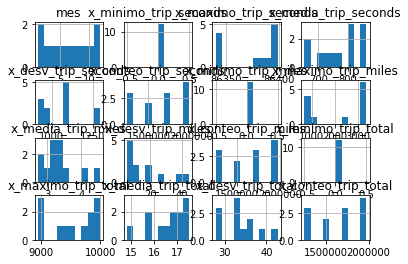

In [49]:
hive.table('chicago.agregado').toPandas().hist()

## Cruzar y Apilar 

In [50]:
x, y = df.filter(df['mes']==201601).select('taxi_id','trip_total').groupby('taxi_id').sum(),df.filter(df['mes']==201602).select('taxi_id','trip_total').groupby('taxi_id').sum()

In [51]:
x.show(4)

+-------+------------------+
|taxi_id|   sum(trip_total)|
+-------+------------------+
|   6194|5135.3099999999995|
|   4821|           5300.75|
|   1436|           5951.87|
|   1159|11365.640000000001|
+-------+------------------+
only showing top 4 rows



In [52]:
x.join(y,['taxi_id'],'inner').printSchema()

root
 |-- taxi_id: string (nullable = true)
 |-- sum(trip_total): double (nullable = true)
 |-- sum(trip_total): double (nullable = true)



In [ ]:
x.join(y,['taxi_id'],'inner').show(5)

In [ ]:
x.withColumn('mes',F.lit('201601')).union(y.withColumn('mes',F.lit('201602'))).printSchema()